In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [55]:
#Source: https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv
df = pd.read_csv('movies_metadata.csv')
df.dtypes

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [56]:
df2 = df.loc[0:,('imdb_id','title','budget','genres','release_date', 'revenue', 'status','adult')]
df2 = df2.sort_values(by = ['revenue'], ascending = False)
df2 = df2.reset_index(drop=True)
df2 = df2.dropna()
df2

,imdb_id,title,budget,genres,release_date,revenue,status,adult
0,tt0499549,Avatar,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2009-12-10,2787965087.00000,Released,False
1,tt2488496,Star Wars: The Force Awakens,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-12-15,2068223624.00000,Released,False
2,tt0120338,Titanic,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1997-11-18,1845034188.00000,Released,False
3,tt0848228,The Avengers,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2012-04-25,1519557910.00000,Released,False
4,tt0369610,Jurassic World,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-06-09,1513528810.00000,Released,False
...,...,...,...,...,...,...,...,...
45455,tt0029940,Boy Meets Girl,0,"[{'id': 35, 'name': 'Comedy'}]",1938-08-27,0.00000,Released,False
45456,tt0064679,Model Shop,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1969-02-11,0.00000,Released,False
45457,tt0022725,Broken Lullaby,0,"[{'id': 18, 'name': 'Drama'}]",1932-01-24,0.00000,Released,False
45458,tt0029675,The Toast of New York,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1937-07-30,0.00000,Released,False


In [89]:
#Filtering out unreleased films and adult films
criteria_1 = df2['status'] == 'Released'
criteria_2 = df2['adult'] == 'False'
criteriaAll = criteria_1 & criteria_2
df2[criteriaAll] 

,imdb_id,title,budget,genres,release_date,revenue,status,adult
0,tt0499549,Avatar,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2009-12-10,2787965087.00000,Released,False
1,tt2488496,Star Wars: The Force Awakens,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-12-15,2068223624.00000,Released,False
2,tt0120338,Titanic,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1997-11-18,1845034188.00000,Released,False
3,tt0848228,The Avengers,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2012-04-25,1519557910.00000,Released,False
4,tt0369610,Jurassic World,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",2015-06-09,1513528810.00000,Released,False
...,...,...,...,...,...,...,...,...
45455,tt0029940,Boy Meets Girl,0,"[{'id': 35, 'name': 'Comedy'}]",1938-08-27,0.00000,Released,False
45456,tt0064679,Model Shop,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",1969-02-11,0.00000,Released,False
45457,tt0022725,Broken Lullaby,0,"[{'id': 18, 'name': 'Drama'}]",1932-01-24,0.00000,Released,False
45458,tt0029675,The Toast of New York,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1937-07-30,0.00000,Released,False


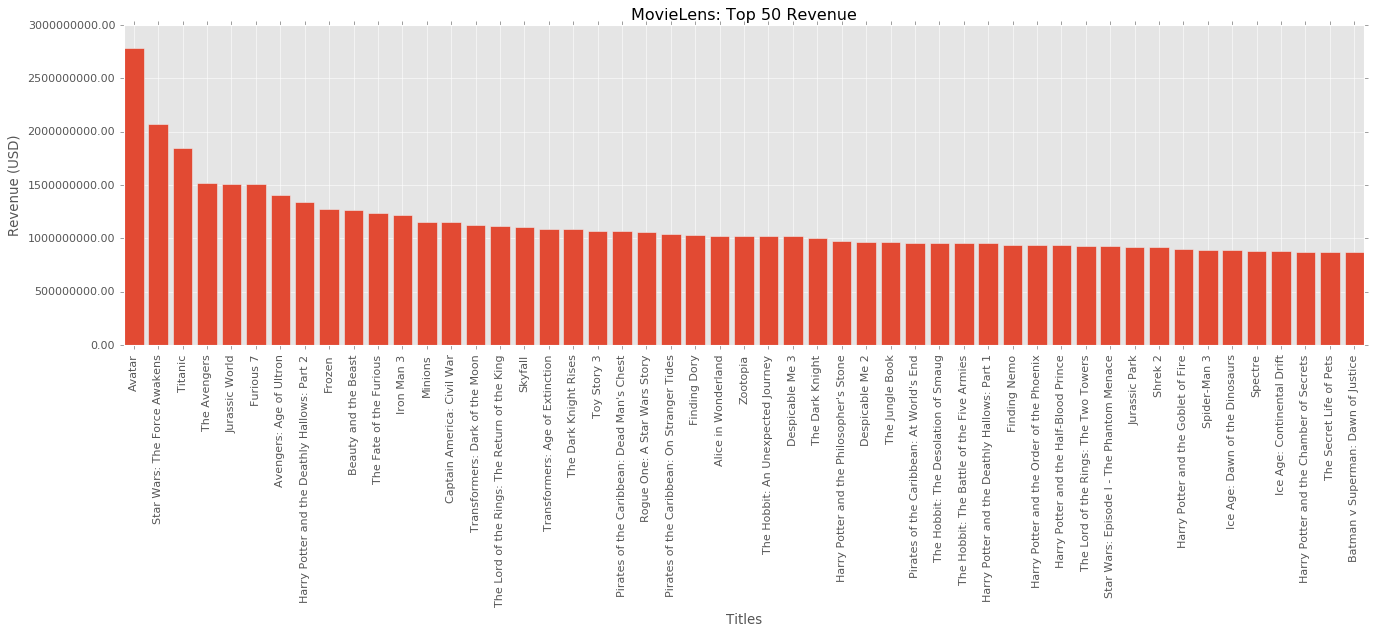

In [90]:
x = df2.loc[0:50,'title']
y = df2.loc[0:50,'revenue']
plt.xlabel('Titles')
plt.ylabel('Revenue (USD)')
plt.title('MovieLens: Top 50 Revenue')
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.rcParams['figure.figsize'] = [20,5]
plt.tick_params(axis ='x', rotation = 90) 
plt.bar(x,y)
plt.show()